In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils import *
warnings.filterwarnings('ignore')

In [34]:
INPUT_DATA_DIR = 'output'

filter_info = {
    'acc_holder': 'any',
    'date_period': {
        'type': 'month',
        'year': 2024,
        'month': 6
    },
}

filename = get_title(filter_info)
data = pd.read_excel(f'{INPUT_DATA_DIR}/{filename}.xlsx', index_col=False)
data.head(2)

,Date,Description,Amount,AutoCategory,AccHolder,BankName,AccType,Category,Subcategory
0,2024-06-01,ANNUAL MEMBERSHIP FEE,-95.00,Fees & Adjustments,nowrin,chase,credit,subscriptions,sapphire
1,2024-06-01,ATT*BILL PAYMENT,-55.35,Bills & Utilities,sachin,chase,credit,utilities,wifi


In [35]:
def plot_cat_expenses(df, cat):
    print('========')
    cat_expenses = df.query(f"Category == '{cat}'").pivot_table(values='Amount', index='Subcategory', aggfunc='sum').squeeze().sort_values(ascending=False)
    display(cat_expenses.to_frame().T)
    plot_pie(cat_expenses, cat)
    print('========')
    

Category,education,entertainment,subscriptions,groceries,selfcare,shopping,restaurant,investment,social,utilities,travel
Amount,-95.0,-153.11,-188.3,-270.26,-305.75,-392.72,-826.71,-1236.0,-1455.1,-2416.24,-2464.51


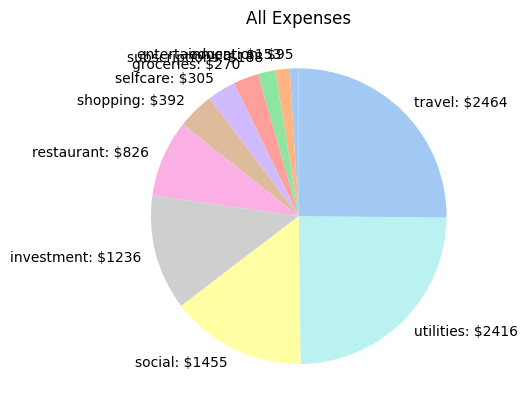

In [36]:
all_expenses = data.pivot_table(values='Amount', index='Category', aggfunc='sum').squeeze().sort_values(ascending=False)
relevant_expenses = all_expenses.drop(index=['salary', 'others', 'transfer'], errors='ignore')
display(relevant_expenses.to_frame().T)
plot_pie(relevant_expenses, "All Expenses")

In [37]:
all_expenses['restaurant']

-826.71

In [45]:
def tabulate(df, cats, title="", expense=True):
    amounts = []
    cat_titles = []
    for cat in cats:
        if len(cat) == 1:
            amount = data.query(f"Category == '{cat[0]}'")['Amount'].sum()
        else:
            amount = data.query(f"Category == '{cat[0]}' and Subcategory == '{cat[1]}'")['Amount'].sum()
        if expense:
            amount *= -1
        if amount != 0:
            amounts.append(amount)
            cat_titles.append(cat[-1].title())

    res_df = pd.DataFrame({
        'Category': cat_titles,
        'Actual': amounts
    })
    print(title)
    display(res_df)
    print("========")

In [46]:
categs = [
    ['house', 'rent'],
    ['utilities', 'verizon'],
    ['utilities', 'wifi'],
    ['utilities', 'car insurance']
]
tabulate(data, categs, 'Sachin Fixed Expenses')

categs = [   
    ['restaurant'],
    ['groceries'],
    ['utilities', 'electricity'],
    ['subscriptions'],
    ['entertainment']
]
tabulate(data, categs, 'Sachin Variable Expenses')

categs = [   
    ['travel', 'gas'],
    ['selfcare'],
    ['travel', 'flight'],
    ['education'],
    ['shopping'],
    ['social', 'gifts']
]
tabulate(data, categs, 'Nowrin Variable Expenses')

Sachin Fixed Expenses


,Category,Actual
0,Verizon,209.24
1,Wifi,55.35
2,Car Insurance,126.03


Sachin Variable Expenses


,Category,Actual
0,Restaurant,826.71
1,Groceries,270.26
2,Electricity,76.56
3,Subscriptions,188.30
4,Entertainment,153.11


Nowrin Variable Expenses


,Category,Actual
0,Gas,93.13
1,Selfcare,305.75
2,Flight,2325.56
3,Education,95.00
4,Shopping,392.72
5,Gifts,158.02


Category,salary,transfer
Amount,6649.51,6068.28


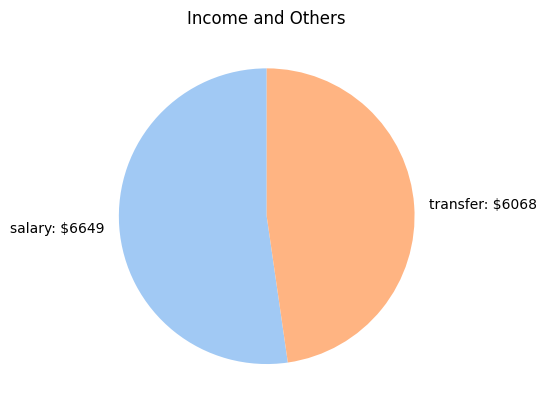

In [40]:
income_and_others = pd.DataFrame(all_expenses).query("Category in ['salary', 'others', 'transfer']")
display(income_and_others.T)
plot_pie(income_and_others, "Income and Others")

Subcategory,online transfer,credit bill,zelle
Amount,10103.0,0.0,-4034.72


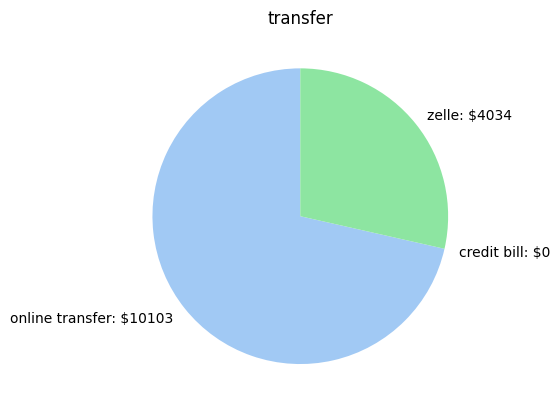

Subcategory,others,cab,gas,flight
Amount,-5.5,-40.32,-93.13,-2325.56


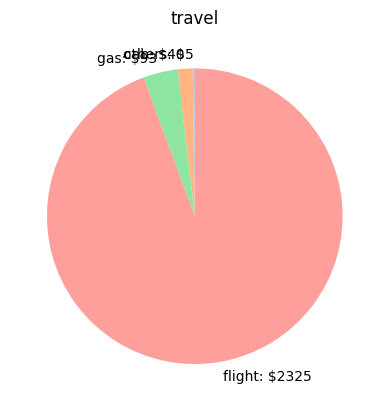

Subcategory,others,target,online,clothes
Amount,-10.87,-100.29,-103.21,-178.35


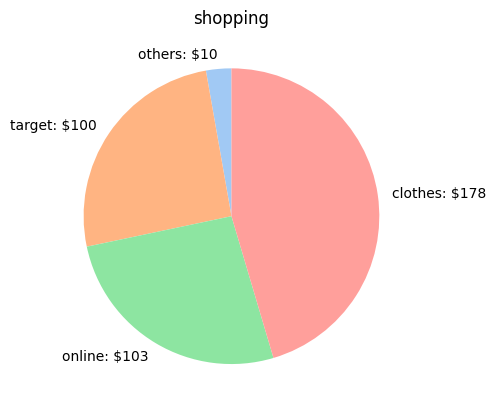

Subcategory,wifi,electricity,car insurance,verizon,others
Amount,-55.35,-76.56,-126.03,-209.24,-1949.06


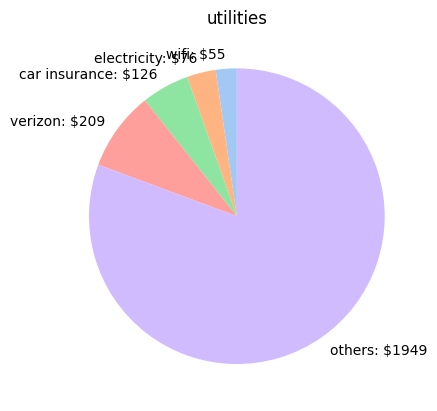

Subcategory,michigan,walmart
Amount,4104.91,2544.6


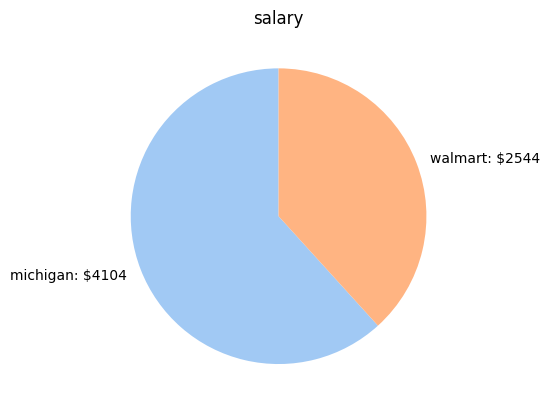

Subcategory,india plaza,a chau market,desi bazaar,community butcher,others,india mart,walmart
Amount,-6.17,-12.46,-15.22,-15.65,-36.01,-85.81,-98.94


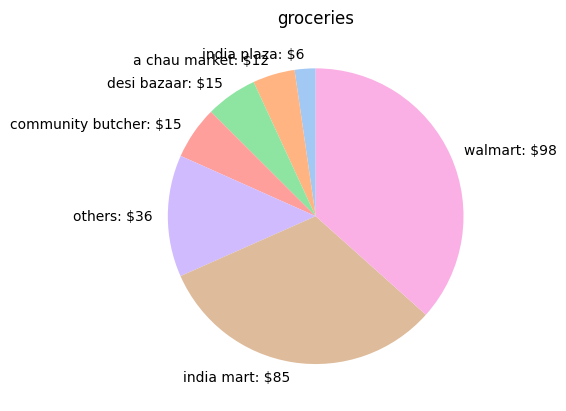

Subcategory,frontier,mcdonald,panda express,viras kerala kitchen,ihop,online,others
Amount,-9.78,-11.17,-14.26,-39.84,-75.03,-82.09,-594.54


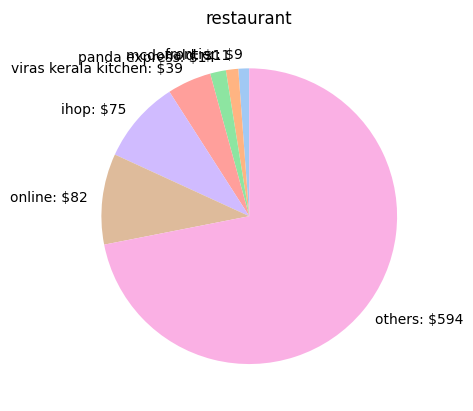

In [41]:
# TODO: add 'others' and other categories that may not appear in that month's data. ie, it should not throw error even if that cat dont exist
for cat in ['transfer', 'travel', 'shopping', 'utilities', 'salary', 'groceries', 'restaurant']:
    plot_cat_expenses(data, cat)

Other functions:

* `visualize_salary(data)`: to see salary trajectory across months
* `visualize_salary(food)`: to see groceries and restaurant trajectory across months